In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
data = '1.csv'
df = pd.read_csv(data)

df = df[(df.正負樣本 == 1) | (df.正負樣本 == -1)]

In [59]:
# 查看數據集的維度
df.shape

(321, 16)

In [60]:
# 讓我們預覽數據集
df.head()

,代碼,股票,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
0,1101,台泥,11.00,3.69,26.64,5.87,39.85,8.38,1,1,1,1,1,0,5,1
1,1102,亞泥,9.81,4.05,24.67,6.29,44.05,27.37,0,1,1,1,1,1,5,1
5,1109,信大,14.89,2.40,30.69,5.75,17.40,36.22,1,1,1,1,1,1,6,1
7,1203,味王,12.00,1.86,32.54,3.41,32.30,28.84,1,1,1,0,1,1,5,1
9,1213,大飲,-9.02,-0.89,4.96,0.00,7.58,12.91,0,0,0,0,1,1,2,-1


In [61]:
# 讓我們預覽數據集
col_names = df.columns
col_names

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股',
       'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test',
       '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [62]:
# 從列名中刪除前導空格
df.columns = df.columns.str.strip()
df.columns

Index(['代碼', '股票', 'ROE_5Y', 'EPS_5Y', '毛利率_5Y', '現金殖利率', '股價', '董監持股',
       'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test',
       '董監持股_Test', '符合數量', '正負樣本'],
      dtype='object')

In [63]:
# 檢查 All 列的分佈
df['正負樣本'].value_counts()

 1    181
-1    140
Name: 正負樣本, dtype: int64

In [64]:
# 查看 All 列的百分比分佈
df['正負樣本'].value_counts()/np.float(len(df))

 1    0.563863
-1    0.436137
Name: 正負樣本, dtype: float64

In [65]:
# 查看數據集摘要
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 829
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   代碼          321 non-null    int64  
 1   股票          321 non-null    object 
 2   ROE_5Y      321 non-null    float64
 3   EPS_5Y      321 non-null    float64
 4   毛利率_5Y      321 non-null    float64
 5   現金殖利率       321 non-null    float64
 6   股價          321 non-null    float64
 7   董監持股        321 non-null    float64
 8   ROE_Test    321 non-null    int64  
 9   EPS_Test    321 non-null    int64  
 10  毛利率_Test    321 non-null    int64  
 11  現金殖利率_Test  321 non-null    int64  
 12  股價_Test     321 non-null    int64  
 13  董監持股_Test   321 non-null    int64  
 14  符合數量        321 non-null    int64  
 15  正負樣本        321 non-null    int64  
dtypes: float64(6), int64(9), object(1)
memory usage: 42.6+ KB


In [66]:
# 檢查變量中的缺失值
df.isnull().sum()

代碼            0
股票            0
ROE_5Y        0
EPS_5Y        0
毛利率_5Y        0
現金殖利率         0
股價            0
董監持股          0
ROE_Test      0
EPS_Test      0
毛利率_Test      0
現金殖利率_Test    0
股價_Test       0
董監持股_Test     0
符合數量          0
正負樣本          0
dtype: int64

In [67]:
# 查看數值變量中的匯總統計
round(df.describe(),2)

,代碼,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股,ROE_Test,EPS_Test,毛利率_Test,現金殖利率_Test,股價_Test,董監持股_Test,符合數量,正負樣本
count,321.00,321.00,321.00,321.00,321.00,321.00,321.00,321.00,321.00,321.0,321.00,321.0,321.00,321.00,321.00
mean,3887.74,4.90,2.48,20.36,4.40,43.09,21.46,0.51,0.70,0.5,0.46,0.9,0.72,3.80,0.13
std,2321.62,20.77,3.41,20.15,3.12,37.44,16.68,0.50,0.46,0.5,0.50,0.3,0.45,1.79,0.99
min,1101.00,-215.93,-5.66,-113.93,0.00,1.13,0.00,0.00,0.00,0.0,0.00,0.0,0.00,1.00,-1.00
25%,2345.00,-1.04,-0.11,10.41,2.04,18.35,9.29,0.00,0.00,0.0,0.00,1.0,0.00,2.00,-1.00
50%,3019.00,10.17,2.37,20.10,4.64,33.40,16.30,1.00,1.00,1.0,0.00,1.0,1.00,5.00,1.00
75%,5546.00,14.53,4.03,29.76,6.23,55.70,29.55,1.00,1.00,1.0,1.00,1.0,1.00,5.00,1.00
max,9958.00,35.13,20.67,83.16,26.23,270.50,80.32,1.00,1.00,1.0,1.00,1.0,1.00,6.00,1.00


Text(0, 0.5, '董監持股')

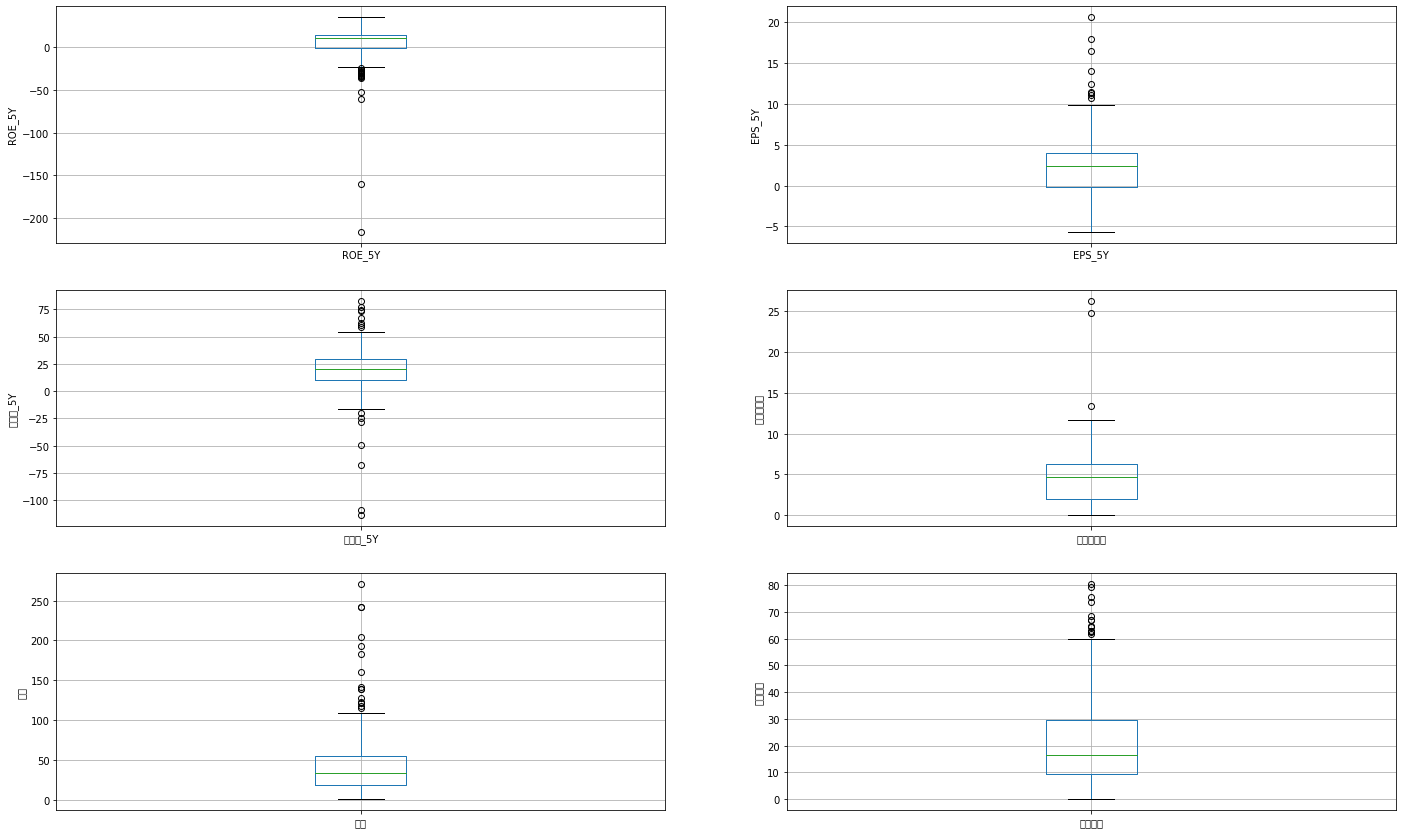

In [68]:
# 繪製箱線圖以可視化異常值
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='ROE_5Y')
fig.set_title('')
fig.set_ylabel('ROE_5Y')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='EPS_5Y')
fig.set_title('')
fig.set_ylabel('EPS_5Y')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='毛利率_5Y')
fig.set_title('')
fig.set_ylabel('毛利率_5Y')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='現金殖利率')
fig.set_title('')
fig.set_ylabel('現金殖利率')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='股價')
fig.set_title('')
fig.set_ylabel('股價')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='董監持股')
fig.set_title('')
fig.set_ylabel('董監持股')

Text(0, 0.5, 'Number of pulsar stars')

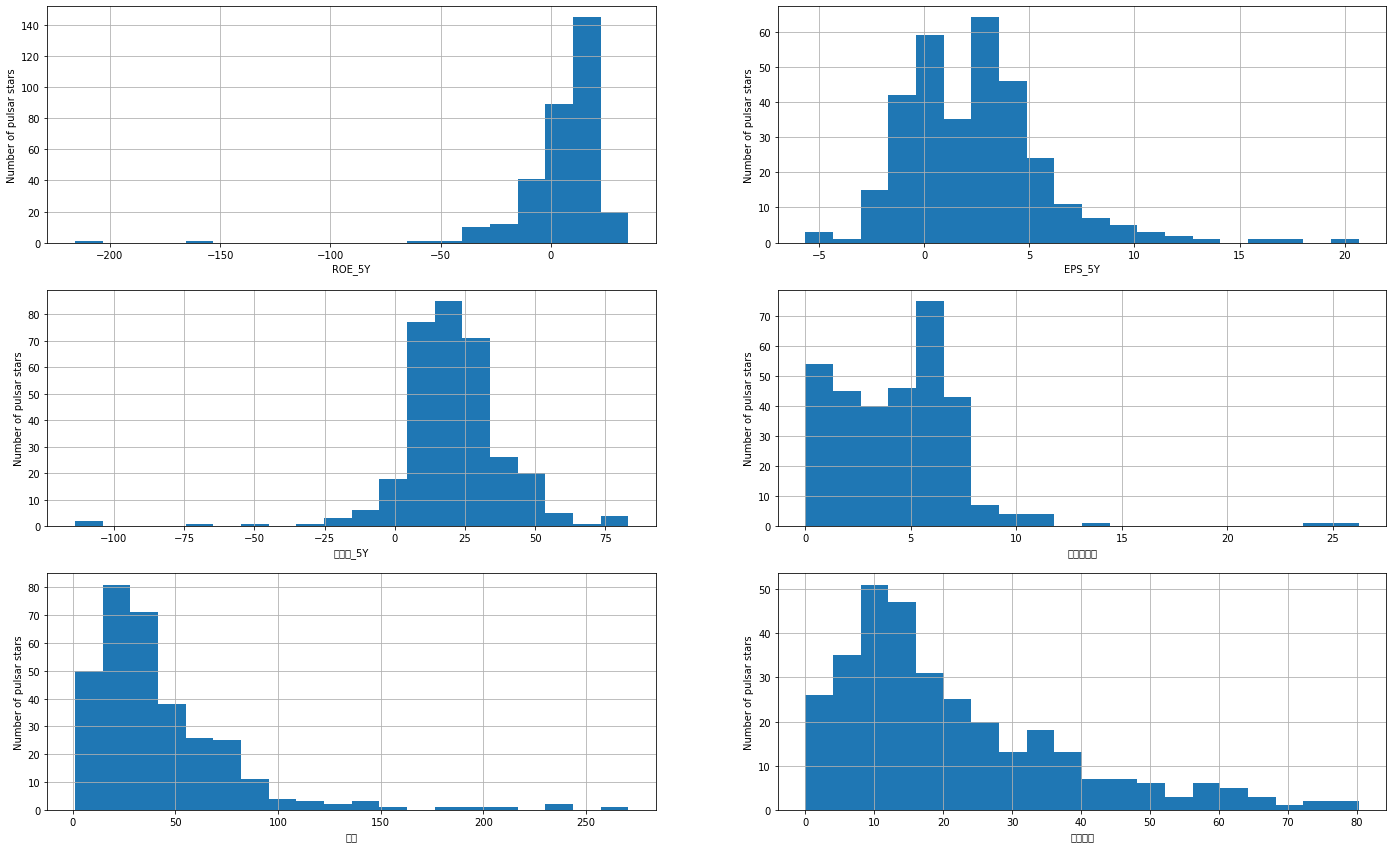

In [69]:
# 繪製直方圖以檢查分佈
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['ROE_5Y'].hist(bins=20)
fig.set_xlabel('ROE_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['EPS_5Y'].hist(bins=20)
fig.set_xlabel('EPS_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['毛利率_5Y'].hist(bins=20)
fig.set_xlabel('毛利率_5Y')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['現金殖利率'].hist(bins=20)
fig.set_xlabel('現金殖利率')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['股價'].hist(bins=20)
fig.set_xlabel('股價')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['董監持股'].hist(bins=20)
fig.set_xlabel('董監持股')
fig.set_ylabel('Number of pulsar stars')

In [70]:
X = df.drop(['代碼', '股票', 'ROE_Test', 'EPS_Test', '毛利率_Test', '現金殖利率_Test', '股價_Test', '董監持股_Test','符合數量','正負樣本'], axis=1)

y = df['正負樣本']

In [71]:
# 將 X 和 y 拆分為訓練集和測試集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [72]:
# 檢查 X_train 和 X_test 的形狀
X_train.shape, X_test.shape

((224, 6), (97, 6))

In [73]:
cols = X_train.columns

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [75]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [76]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [77]:
X_train.describe()

,ROE_5Y,EPS_5Y,毛利率_5Y,現金殖利率,股價,董監持股
count,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02
mean,4.956353e-17,-1.506731e-16,3.965082e-17,3.568574e-17,1.506731e-16,1.566207e-16
std,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00,1.002240e+00
min,-1.087062e+01,-2.173304e+00,-7.065357e+00,-1.470576e+00,-1.063260e+00,-1.285962e+00
25%,-2.894753e-01,-7.628040e-01,-5.280568e-01,-7.694398e-01,-6.415291e-01,-7.410911e-01
50%,2.613798e-01,-5.006749e-02,-2.476088e-03,6.695833e-02,-2.465667e-01,-3.141093e-01
75%,4.561105e-01,4.305805e-01,4.975725e-01,5.917404e-01,3.094453e-01,5.329626e-01
max,1.482905e+00,5.457170e+00,3.047522e+00,7.001273e+00,5.675680e+00,3.424913e+00


In [78]:
# 導入 SVC 分類器
from sklearn.svm import SVC


# 導入指標以計算準確性
from sklearn.metrics import accuracy_score


# 使用默認超參數實例化分類器
svc=SVC() 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9691


In [79]:
# 使用 rbf 內核和 C=100 實例化分類器
svc=SVC(C=100.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9691


In [80]:
# 使用 rbf 內核和 C=1000 實例化分類器
svc=SVC(C=1000.0) 


# 將分類器擬合到訓練集
svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9691


In [81]:
# 使用線性核和 C=1.0 實例化分類器
linear_svc=SVC(kernel='linear', C=1.0) 


# 將分類器擬合到訓練集
linear_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred_test=linear_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9278


In [82]:
# 使用線性核和 C=100.0 實例化分類器
linear_svc100=SVC(kernel='linear', C=100.0) 


# 將分類器擬合到訓練集
linear_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9278


In [83]:
# 用線性核和 C=1000.0 實例化分類器
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# 將分類器擬合到訓練集
linear_svc1000.fit(X_train, y_train)


# 對測試集進行預測
y_pred=linear_svc1000.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9381


In [84]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([ 1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
       -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,
        1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1], dtype

In [85]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9911


In [86]:
# 打印訓練和測試集的分數

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9911
Test set score: 0.9278


In [87]:
# 檢查測試集中的類分佈
y_test.value_counts()

 1    53
-1    44
Name: 正負樣本, dtype: int64

In [88]:
# 檢查空準確度分數

null_accuracy = (53/(53+44))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.5464


In [89]:
# 使用多項式內核和 C=1.0 實例化分類器
poly_svc=SVC(kernel='poly', C=1.0) 


# 將分類器擬合到訓練集
poly_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=poly_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9072


In [90]:
# 使用多項式內核和 C=100.0 實例化分類器
poly_svc100=SVC(kernel='poly', C=100.0) 


# 將分類器擬合到訓練集
poly_svc100.fit(X_train, y_train)


# 對測試集進行預測
y_pred=poly_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9691


In [91]:
# 使用 sigmoid 內核和 C=1.0 實例化分類器
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


# 將分類器擬合到訓練集
sigmoid_svc.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.9175


In [92]:
# 使用 sigmoid 內核和 C=100.0 實例化分類器
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


# 將分類器擬合到訓練集
sigmoid_svc100.fit(X_train,y_train)


# 對測試集進行預測
y_pred=sigmoid_svc100.predict(X_test)


# 計算和打印準確度分數
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.9278


In [93]:
# 打印混淆矩陣並將其切成四塊

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[37  7]
 [ 0 53]]

True Positives(TP) =  37

True Negatives(TN) =  53

False Positives(FP) =  7

False Negatives(FN) =  0


<AxesSubplot:>

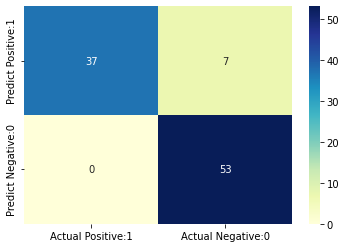

In [94]:
# 使用 seaborn 熱圖可視化混淆矩陣

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          -1       1.00      0.84      0.91        44
           1       0.88      1.00      0.94        53

    accuracy                           0.93        97
   macro avg       0.94      0.92      0.93        97
weighted avg       0.94      0.93      0.93        97



In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [97]:
# 打印分類精度

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9278


In [98]:
# 打印分類錯誤

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0722


In [99]:
# 打印精度分數

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8409


In [100]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 1.0000


In [101]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 1.0000


In [102]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1167


In [103]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8833


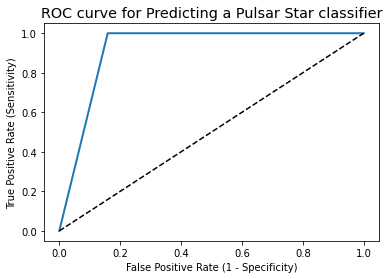

In [104]:
# 繪製 ROC 曲線

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()